In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist_train = pd.read_csv("mnist_train.csv", header=None) # let panfa know that file doen't have headers
mnist_test = pd.read_csv("mnist_test.csv", header=None) 

In [6]:
mnist_train.shape

(60000, 785)

In [9]:
# add headers
cols = ["label"]

for i in range(784):
    cols.append("px_" + str(i + 1))

In [10]:
mnist_train.columns = cols
mnist_test.columns = cols

In [11]:
mnist_train.head(7)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
image_size = 28

In [17]:
train_label = mnist_train["label"].values
test_label = mnist_test["label"].values

In [14]:
type(train_label)

numpy.ndarray

In [15]:
train_label.shape

(60000,)

In [24]:
train_images = mnist_train.values[:, 1:] # all row and all columns except first

In [26]:
train_images.shape

(60000, 784)

In [27]:
test_images = mnist_test.values[:, 1:]

In [28]:
test_images.shape

(10000, 784)

In [30]:
train_images = train_images.reshape(60000, 28, 28)

In [31]:
train_images.shape

(60000, 28, 28)

In [33]:
test_images = test_images.reshape(10000, 28, 28)

In [34]:
test_images.shape

(10000, 28, 28)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_classifier = KNeighborsClassifier(n_jobs=-1)  # n_jobs = all kernels

In [38]:
knn_classifier = knn_classifier.fit(train_images, train_label) # won't work as train_images 3 dimential

ValueError: Found array with dim 3. Estimator expected <= 2.

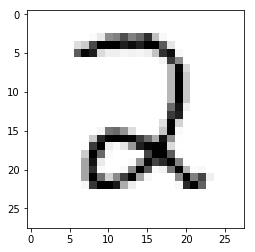

In [40]:
plt.imshow(train_images[432, :, :], cmap="Greys") # we can test images with 3D array

In [41]:
knn_classifier = knn_classifier.fit(train_images.reshape(60000, 784), train_label) # reshape is back to 2d array

In [59]:
image_id = 777

In [60]:
prediction = knn_classifier.predict(test_images[image_id].reshape(1, 784))

In [61]:
prediction

array([1], dtype=int64)

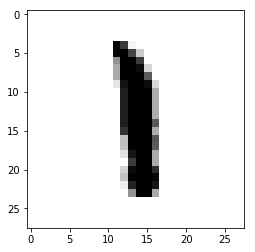

In [62]:
plt.imshow(test_images[image_id], cmap="Greys")

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [65]:
accuracy_score? # = help(accuracy_score)

Signature: accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
Docstring:
Accuracy classification score.

In multilabel classification, this function computes subset accuracy:
the set of labels predicted for a sample must *exactly* match the
corresponding set of labels in y_true.

Read more in the :ref:`User Guide <accuracy_score>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) labels.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Predicted labels, as returned by a classifier.

normalize : bool, optional (default=True)
    If ``False``, return the number of correctly classified samples.
    Otherwise, return the fraction of correctly classified samples.

sample_weight : array-like of shape = [n_samples], optional
    Sample weights.

Returns
-------
score : float
    If ``normalize == True``, return the fraction of correctly
    classified samples (float), else returns the number

In [68]:
all_predictions = knn_classifier.predict(test_images.reshape(10000, 784))

In [69]:
accuracy_score(test_label, all_predictions) * 100

96.88

In [71]:
cm = confusion_matrix(test_label, all_predictions)

In [72]:
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

In [ ]:
# zip - pair together 2 arrays
# enumirate - add numeric ids to each element

In [75]:
# check errors

for i, (real, pred) in enumerate(zip(test_label, all_predictions)):
    if real == 4 and real != pred:
        print("Prediction: " + str(pred))
        plt.imshow(test_images[i], cmap="Greys")
        plt.show()

In [ ]:
# home work
# knn_classifier = KNeighborsClassifier(n_neighbors=???, n_jobs=-1)

# try another algorithm


In [ ]:
# neural network
# image 28 * 28 = 784

# bias,    x1, x2, x3, ..., xn <- n = 784
# a0,      a1, a2, a3, ..., an <- n = 784
# X = a1 * x1 + a2 * x2 + ... an * xn + a0 * bias <- digit
# f(X) -> Y

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
nn_classifier = MLPClassifier(verbose=True)

In [79]:
nn_classifier = nn_classifier.fit(train_images.reshape(60000, 784), train_label)

Iteration 1, loss = 2.35898168
Iteration 2, loss = 0.77117644
Iteration 3, loss = 0.43488531
Iteration 4, loss = 0.29251000
Iteration 5, loss = 0.21694446
Iteration 6, loss = 0.17682337
Iteration 7, loss = 0.15056198
Iteration 8, loss = 0.13433406
Iteration 9, loss = 0.12492044
Iteration 10, loss = 0.11367200
Iteration 11, loss = 0.10594646
Iteration 12, loss = 0.10888724
Iteration 13, loss = 0.10354280
Iteration 14, loss = 0.09290382
Iteration 15, loss = 0.09012756
Iteration 16, loss = 0.08640480
Iteration 17, loss = 0.09098213
Iteration 18, loss = 0.08850327
Iteration 19, loss = 0.08281249
Iteration 20, loss = 0.07810901
Iteration 21, loss = 0.07560857
Iteration 22, loss = 0.07370706
Iteration 23, loss = 0.07789081
Iteration 24, loss = 0.07420202
Iteration 25, loss = 0.07186546
Iteration 26, loss = 0.07053569
Iteration 27, loss = 0.06722720
Iteration 28, loss = 0.06495435
Iteration 29, loss = 0.06311215
Iteration 30, loss = 0.06164931
Iteration 31, loss = 0.05865546
Iteration 32, los

In [90]:
image_id = 150

In [91]:
prediction = nn_classifier.predict(test_images[image_id].reshape(1, 784))

In [92]:
prediction

array([9], dtype=int64)

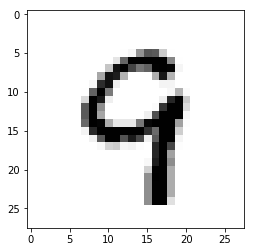

In [93]:
plt.imshow(test_images[image_id], cmap="Greys")

In [94]:
all_predictions = nn_classifier.predict(test_images.reshape(10000, 784))

In [95]:
accuracy_score(test_label, all_predictions) * 100

96.55

In [96]:
cm = confusion_matrix(test_label, all_predictions)

In [98]:
cm

array([[ 968,    1,    0,    1,    3,    1,    3,    0,    2,    1],
       [   0, 1123,    4,    3,    0,    0,    1,    0,    4,    0],
       [   8,    1,  983,    6,    7,    1,    6,   11,    8,    1],
       [   2,    0,    6,  978,    1,    7,    0,    3,    7,    6],
       [   2,    1,    2,    0,  947,    0,    9,    4,    3,   14],
       [   5,    1,    0,   19,    1,  842,    6,    0,    9,    9],
       [   4,    2,    1,    0,    4,    9,  930,    1,    6,    1],
       [   3,    1,    8,    5,    5,    0,    0,  987,    5,   14],
       [  10,    1,    4,    6,    3,    3,    5,    3,  937,    2],
       [   4,    2,    0,    6,   16,    4,    0,    7,   10,  960]],
      dtype=int64)

In [100]:
# for i, (real, pred) in enumerate(zip(test_label, all_predictions)):
#     if real == 4 and real != pred:
#         print("Prediction: " + str(pred))
#         plt.imshow(test_images[i], cmap="Greys")
#         plt.show()

In [ ]:
# Home work 
# MPLClassifier(hidden_layer_size=???, activation=???)